A demonstration of K-means Clustering on Synthetic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# a blob of synthetic data with 1000 sample points spread across 5 clusters with std_dev 2.0 (returns a 2-dimensional array x)
X, y = make_blobs(n_samples = 1000, cluster_std = 1.0, n_features = 2, centers = 5, random_state = 11, return_centers = False)

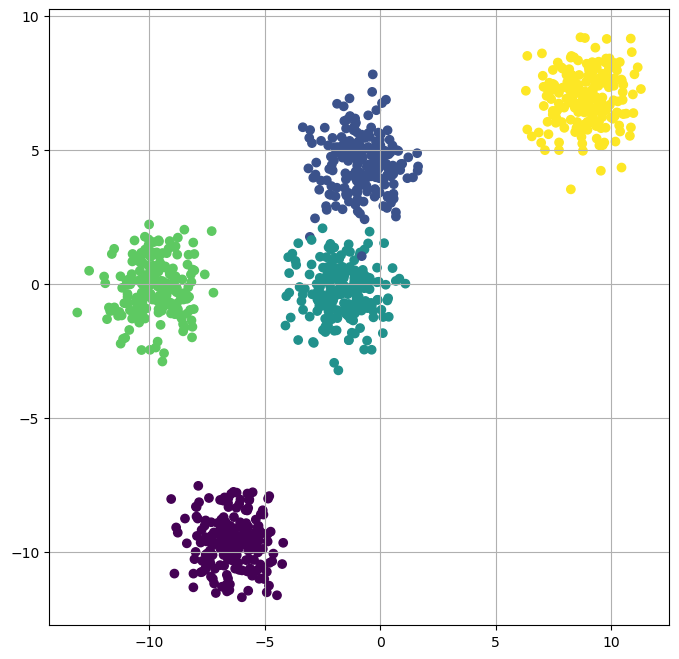

In [3]:
plt.figure(figsize = (8,8))
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [4]:
k = 5 # that is how many initial centers we choose to assign

colors = ['green','yellow','blue','cyan','red'] # color scheme for each center

clusters = {} # centers go into this dictionary

for i in range(k):
    
    center = 10*(2*np.random.random((X.shape[1],))-1) #randomly choose a center between -10 and 10 having (x, y)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : colors[i]
    }
    clusters[i] = cluster
    
    # clusters is a dictionary that takes index to a dictionary of center, points and colors. 

In [5]:
clusters

{0: {'center': array([-9.73208837,  3.33189557]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.31829539,  8.1600021 ]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([2.27903381, 3.1105118 ]), 'points': [], 'color': 'blue'},
 3: {'center': array([-0.46493747,  3.76776333]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([1.49321372, 8.25980145]), 'points': [], 'color': 'red'}}

Visualizing the blobs and randomly initialized centers

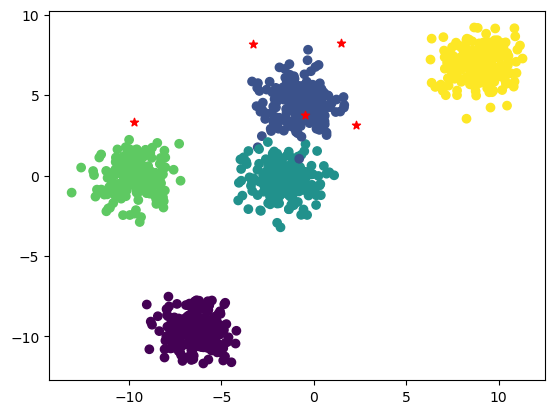

In [6]:
plt.scatter(X[:,0],X[:,1],c=y) # plotting the blobs

for i in clusters:
    center = clusters[i]['center']
    
    plt.scatter(center[0],center[1],marker = '*',c = 'red')

plt.show()

In [7]:
def distance(v1, v2): # returns distance between two points v1 and v2
    
    return np.sqrt(np.sum((v1 - v2)**2))
    

# The E-Step (Assignment of Clusters)

In [8]:
def assign_clusters():
    
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        
        for i in range(k):
            d = distance(curr_x, clusters[i]['center'])
            dist.append(d)
            
        cluster_now = np.argmin(dist) # the index where dist is minimum
        
        clusters[cluster_now]['points'].append(curr_x) # now assign the point to that cluster

# Updating Clusters

In [9]:
def update_clusters(): # M-Step
    
    for idx in range(k):
        
        pts = np.array(clusters[idx]['points']) # points in a particular cluster
        
        if pts.shape[0] > 0: # check that the points is not empty
            
            new_center = pts.mean(axis = 0) # new center is the mean of the points in that cluster
            
            clusters[idx]['center'] = new_center # update the center to new_center
            
            clusters[idx]['points'] = []   # empty the points of that cluster, since it will be updated in the E-step

# Plotting for visualization

In [10]:
def visualize_clusters():
    
    for i in range(k):
        pts = np.array(clusters[i]['points']) # points in this particular cluster
        
        try:
            plt.scatter(pts[:,0], pts[:,1], c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], c = 'black', marker = '^')

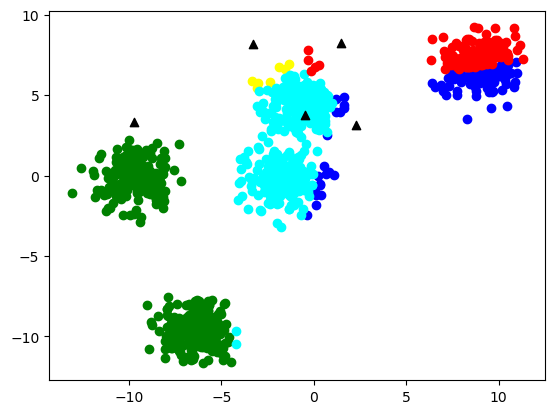

In [11]:
update_clusters()
assign_clusters()
visualize_clusters()

In [12]:
from sklearn.cluster import KMeans

In [21]:
k_means_clusterer = KMeans(n_clusters = 8, init = 'k-means++', tol = 0.01, n_init = 14) # init is default k-means++

In [22]:
R, s = make_blobs(n_samples = 1000, cluster_std = 1.0, n_features = 2, centers = 5, random_state = 2, return_centers = False)

In [23]:
k_means_clusterer.fit(R, s)

KMeans(n_init=14, tol=0.01)

In [24]:
centers = k_means_clusterer.cluster_centers_

In [25]:
centers

array([[ 1.31901514, -2.42477785],
       [-3.99058294, -4.69358272],
       [-5.88974465,  1.58766587],
       [-0.48133193, -9.18999579],
       [ 0.70718385, -0.85079807],
       [-1.63941421, -3.47177601],
       [-5.81063847,  3.22183064],
       [-2.03879567, -9.72892778]])

In [26]:
labels = k_means_clusterer.labels_

In [27]:
print(labels)

[5 1 2 0 5 7 5 2 1 2 0 3 5 3 7 6 2 2 5 5 1 7 7 2 5 1 2 1 4 5 3 7 5 2 4 7 0
 1 1 0 2 5 5 6 5 4 3 2 4 7 7 2 3 1 6 2 5 3 5 1 2 0 2 7 4 2 4 4 2 7 5 4 2 1
 5 6 5 4 5 2 6 0 5 2 7 5 2 2 5 5 1 3 2 3 4 6 5 7 1 3 6 6 5 5 5 5 5 4 7 1 4
 5 5 5 3 7 3 7 2 5 0 6 4 1 4 6 1 3 5 7 5 7 3 0 5 4 1 1 5 6 1 4 7 5 1 5 0 4
 5 1 5 5 5 3 0 4 5 5 1 6 4 2 5 1 7 5 3 0 4 5 5 5 1 7 5 6 5 2 6 2 1 0 6 2 2
 5 1 4 3 3 0 6 6 2 0 7 2 2 5 1 1 5 1 6 1 0 5 5 3 2 4 2 1 3 7 6 3 5 3 5 6 1
 1 7 6 0 5 4 1 6 6 5 1 6 1 1 6 7 5 5 4 4 1 2 0 3 5 7 5 5 3 5 5 4 4 7 5 2 5
 0 1 0 5 5 2 4 2 3 1 1 5 3 4 5 7 5 0 2 0 3 1 2 7 0 5 3 5 7 1 5 2 4 1 0 1 5
 6 7 1 7 1 3 2 0 4 6 7 5 4 3 5 5 2 2 6 7 7 5 5 4 4 5 5 0 0 6 6 4 4 0 5 4 0
 1 6 5 7 6 2 0 2 4 3 4 2 4 7 6 2 4 2 4 4 3 2 5 2 4 3 0 5 1 6 7 5 6 2 7 3 7
 6 5 7 5 3 2 5 2 1 7 2 3 1 5 1 0 5 3 5 0 1 5 2 7 7 1 3 5 1 0 1 4 7 2 5 1 2
 2 5 3 0 0 2 6 6 5 3 2 1 3 1 2 1 5 3 7 7 1 5 5 1 2 0 6 2 0 4 4 1 5 7 1 2 2
 1 7 0 4 4 5 4 7 4 7 5 1 5 4 4 3 1 1 2 5 6 3 3 1 2 5 3 6 2 0 3 1 1 3 1 0 4
 3 1 4 7 6 1 3 4 0 4 3 1 

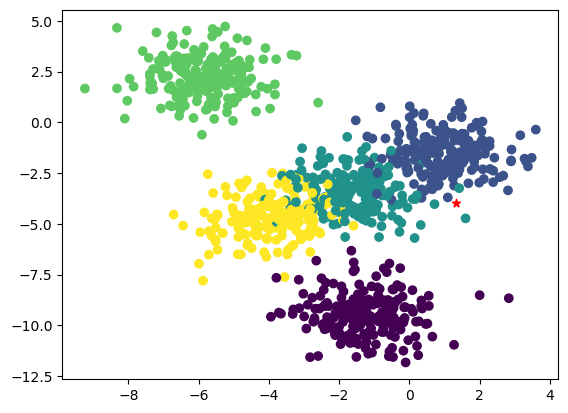

In [28]:
plt.scatter(R[:,0], R[:,1], c = s)
plt.scatter(centers[:,0][0], centers[:,0][1], marker = '*', color = 'RED')
plt.show()